In [137]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display, clear_output
import time
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Video
import matplotlib.image as mpimg
import matplotlib.animation as animation
import ipywidgets as widgets
import ffmpeg
import mpmath as mp

In [138]:
# Dimensionless data

G = 1

m2 = 3.054200000000000e-6
m1 = 1 - m2

r12 = 1

x1 = -m2
x2 = m1

w = 1

mu1 = m1
mu2 = m2

In [139]:
# Initial conditions 

x = 1.0111555695836572
y = 0
z = 3.3421700407359777e-3	

xd = 0
yd = -1.0398439218275901e-2
zd = 0

# period

t_final = 3.0913102168233957

In [140]:
# initial rho1 and rho2

rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))

rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))

rho1,rho2

(np.float64(1.0111641471851347), np.float64(0.011648389816897127))

In [141]:
# Jacobi constant

c = (w**2)*((x**2)+(y**2)) + ((2*mu1)/(rho1)) + ((2*mu2)/(rho2)) - ((xd**2)+(yd**2)+(zd**2))

c

np.float64(3.0007640458258282)

In [142]:
def derivatives(x,y,z,xd,yd,zd):

    rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))
    rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))

    xdd = (w**2)*x + 2*w*yd - (mu1*(x-x1))/(rho1**3) - (mu2*(x-x2))/(rho2**3)
    
    ydd = (w**2)*y - 2*w*xd - (mu1*(y))/(rho1**3) - (mu2*(y))/(rho2**3) 

    zdd = - (mu1*(z))/(rho1**3) - (mu2*(z))/(rho2**3) 

    return (xdd, ydd, zdd)
    

In [143]:
# Runge-Kutta 4th-order

# Apeending values

r = []
r.append([x,y,z])

rd = []
rd.append([xd,yd,zd])

c_rk4 = []
c_rk4.append(c)

time = []
time.append(0)

# step-size

h = 0.0001

for i in range(int(t_final/h)):
    
    # k1

    call = derivatives(x,y,z,xd,yd,zd)
    
    k1_1 = call[0]
    k1_2 = call[1]
    k1_3 = call[2]
    k1_4 = xd
    k1_5 = yd
    k1_6 = zd
    
    
    # k2

    call = derivatives(x+(h/2)*k1_4, y+(h/2)*k1_5, z+(h/2)*k1_6, xd+(h/2)*k1_1, yd+(h/2)*k1_2, zd+(h/2)*k1_3)
    
    k2_1 = call[0]
    k2_2 = call[1]  
    k2_3 = call[2] 
    k2_4 = xd + (h/2)*k1_1
    k2_5 = yd + (h/2)*k1_2
    k2_6 = zd + (h/2)*k1_3
    
    
    # k3

    call = derivatives(x+(h/2)*k2_4, y+(h/2)*k2_5, z+(h/2)*k2_6, xd+(h/2)*k2_1, yd+(h/2)*k2_2, zd+(h/2)*k2_3)
    
    k3_1 = call[0]
    k3_2 = call[1] 
    k3_3 = call[2]  
    k3_4 = xd + (h/2)*k2_1
    k3_5 = yd + (h/2)*k2_2
    k3_6 = zd + (h/2)*k2_3
    
   
    # k4

    call = derivatives(x+h*k3_4, y+h*k3_5, z+h*k3_6, xd+h*k3_1, yd+h*k3_2, zd+h*k3_3)
    
    k4_1 = call[0] 
    k4_2 = call[1]   
    k4_3 = call[2] 
    k4_4 = xd + h*k3_1
    k4_5 = yd + h*k3_2
    k4_6 = zd + h*k3_3
    

    # update 
    
    xd = xd + (h/6) * ( k1_1 + 2*k2_1 + 2*k3_1 + k4_1 )
    yd = yd + (h/6) * ( k1_2 + 2*k2_2 + 2*k3_2 + k4_2 )
    zd = zd + (h/6) * ( k1_3 + 2*k2_3 + 2*k3_3 + k4_3 )
    x  = x  + (h/6) * ( k1_4 + 2*k2_4 + 2*k3_4 + k4_4 )
    y  = y  + (h/6) * ( k1_5 + 2*k2_5 + 2*k3_5 + k4_5 )
    z  = z  + (h/6) * ( k1_6 + 2*k2_6 + 2*k3_6 + k4_6 )

    # update 

    rho1 = np.sqrt(((x-x1)**2)+(y**2)+(z**2))
    rho2 = np.sqrt(((x-x2)**2)+(y**2)+(z**2))
    
    c = (w**2)*((x**2)+(y**2)) + ((2*mu1)/(rho1)) + ((2*mu2)/(rho2)) - ((xd**2)+(yd**2)+(zd**2))

    # append

    r.append([x,y,z])
    rd.append([xd,yd,zd])
    c_rk4.append(c)

    time.append((i+1)*h)

    

In [144]:
# convert into numpy arrays 

r = np.array(r)
rd = np.array(rd)
c_rk4 = np.array(c_rk4)  
time = np.array(time)

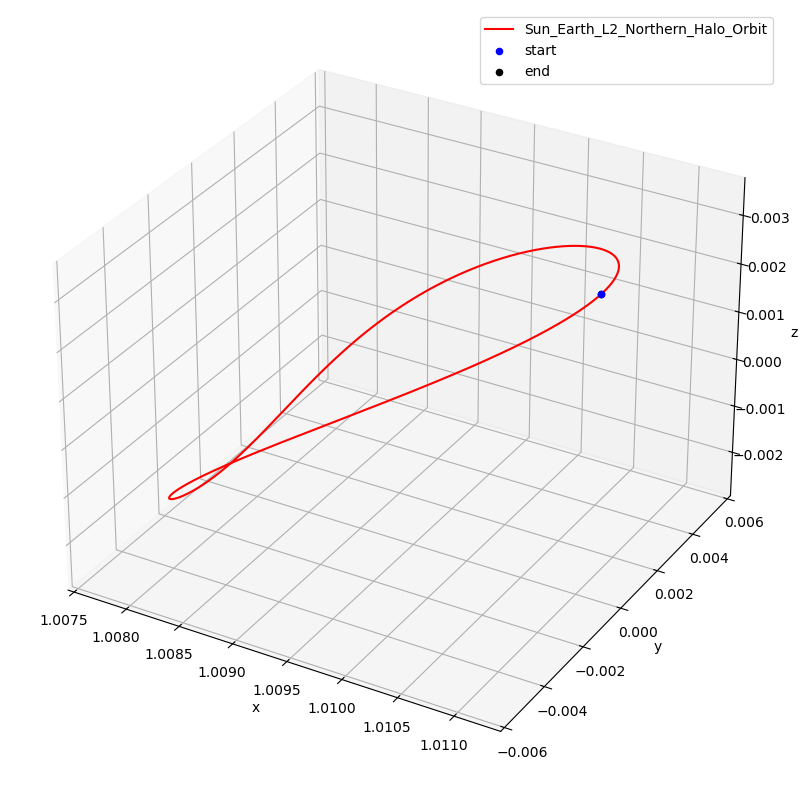

In [145]:
# plotting halo-orbit trajectory

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = r[:,0]
y = r[:,1]
z = r[:,2]   
    

ax.plot(x,y,z, label='Sun_Earth_L2_Northern_Halo_Orbit', color='red')
ax.scatter(x[0], y[0], z[0], color='blue', marker='o', label='start')
ax.scatter(x[-1], y[-1], z[-1], color='black', marker='o', label='end')


# Labels and legend

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set_title('Halo-orbit')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

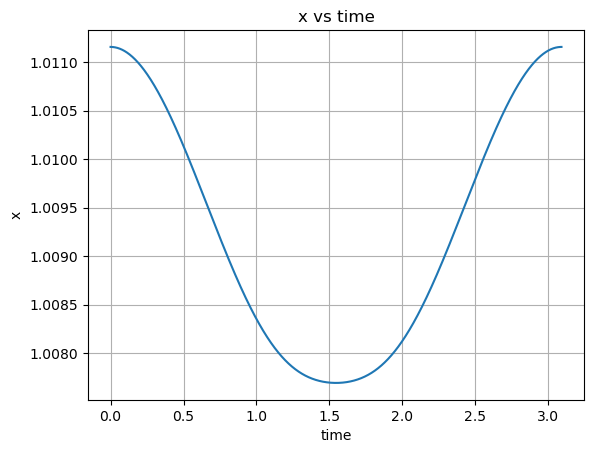

In [146]:
plt.figure()
plt.plot(time ,r[:,0])
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs time")
plt.grid()
plt.show()

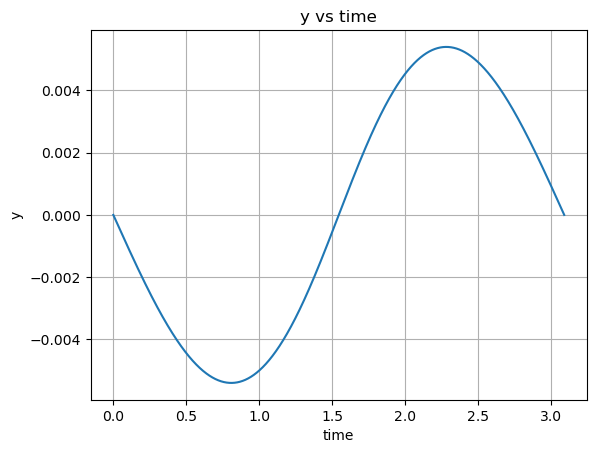

In [147]:
plt.figure()
plt.plot(time ,r[:,1])
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs time")
plt.grid()
plt.show()

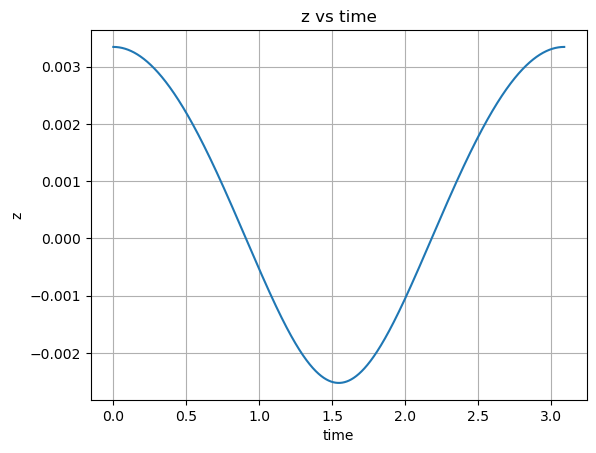

In [148]:
plt.figure()
plt.plot(time ,r[:,2])
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs time")
plt.grid()
plt.show()

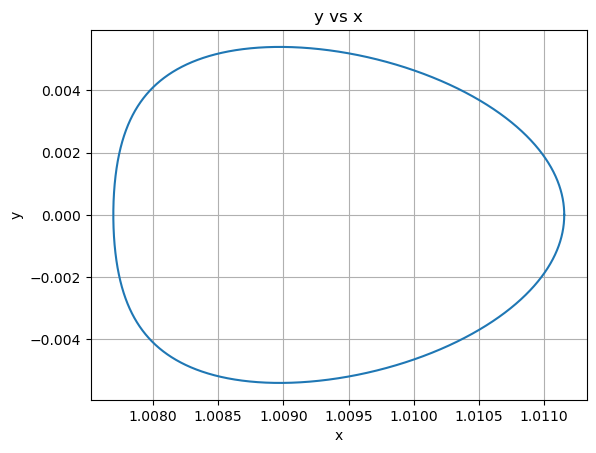

In [149]:
plt.figure()
plt.plot(r[:,0] ,r[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.grid()
plt.show()

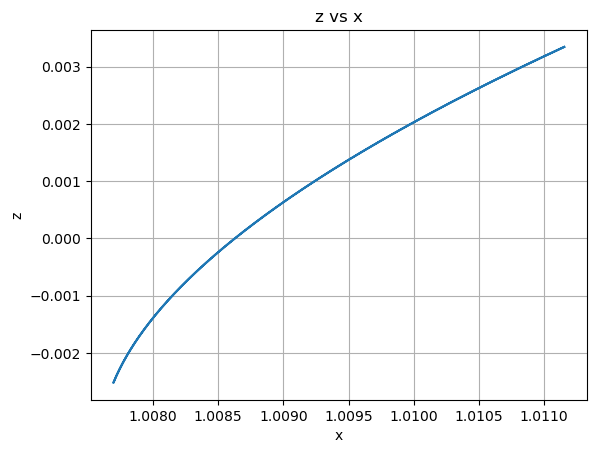

In [150]:
plt.figure()
plt.plot(r[:,0] ,r[:,2])
plt.xlabel("x")
plt.ylabel("z")
plt.title("z vs x")
plt.grid()
plt.show()

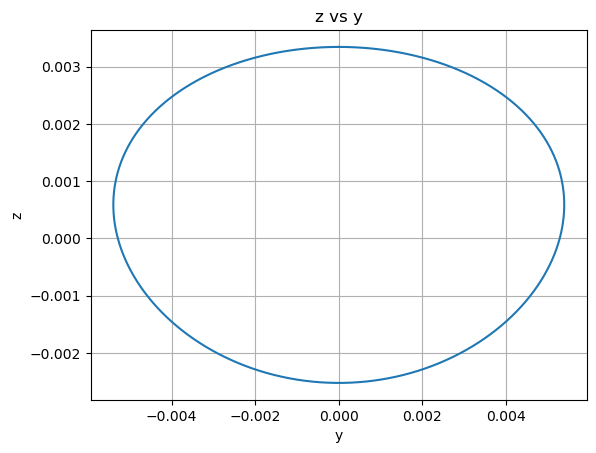

In [151]:
plt.figure()
plt.plot(r[:,1] ,r[:,2])
plt.xlabel("y")
plt.ylabel("z")
plt.title("z vs y")
plt.grid()
plt.show()

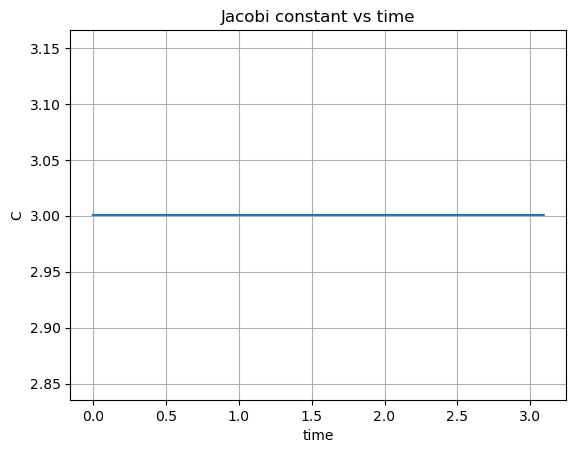

In [152]:
plt.figure()
plt.plot(time ,c_rk4)
plt.xlabel("time")
plt.ylabel("C")
plt.title("Jacobi constant vs time")
plt.grid()
plt.show()

In [153]:
x0 = 1.0111555695836572
z0 = 3.3421700407359777e-3
yd0 = -1.0398439218275901e-2

In [154]:
# base orbit propogation

s = 1.00883544586965
p = 0.00232012371400854
a = -0.00521167988232127
d = 0.000907761728531868
f = 0.00243440831220411

lamda = 1.99521832750105 
m = -0.0765635925193827

s = x0 - p 
a = (yd0/lamda) 
d = z0 - f 

rb = []
timeb = []
Cbase = []


for t in (np.arange(0,t_final,h)):

        xb = s + p * float(mp.re(mp.ellipfun('cn', lamda * t, m))) 
    
        yb = a * float(mp.re(mp.ellipfun('sn', lamda * t, m)))  
    
        zb = d + f * float(mp.re(mp.ellipfun('cn', lamda * t, m)))
    

        xbd = -p * lamda * float(mp.re(mp.ellipfun('sn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m))) 

        ybd = a * lamda * float(mp.re(mp.ellipfun('cn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m))) 

        zbd = -f * lamda * float(mp.re(mp.ellipfun('sn', lamda * t, m))) * float(mp.re(mp.ellipfun('dn', lamda * t, m)))

        rho1b = np.sqrt(((xb+mu2)**2)+(yb**2)+(zb**2))

        rho2b = np.sqrt(((xb-1+mu2)**2)+(yb**2)+(zb**2))

        Cb = (xb**2) + (yb**2) + ((2*mu1)/(rho1b)) + ((2*mu2)/(rho2b)) - ((xbd**2)+(ybd**2)+(zbd**2))

        
        rb.append([xb,yb,zb])
        Cbase.append(Cb)
        
        timeb.append(t)

rb = np.array(rb)  
timeb = np.array(timeb)
Cbase = np.array(Cbase)

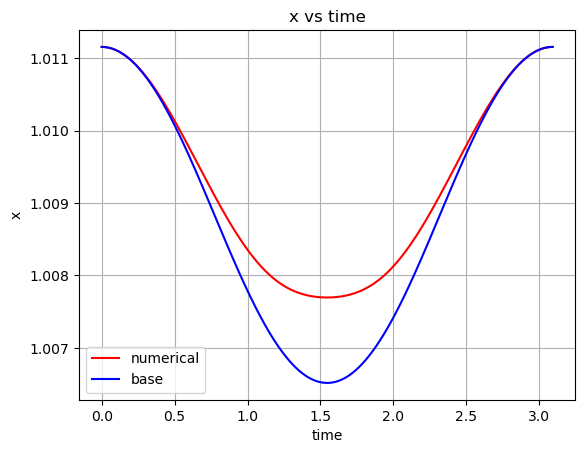

In [155]:
plt.figure()
plt.plot(time ,r[:,0],label='numerical', color='r')
plt.plot(timeb ,rb[:,0],label='base',color='b')
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs time")
plt.grid()
plt.legend()
plt.show()

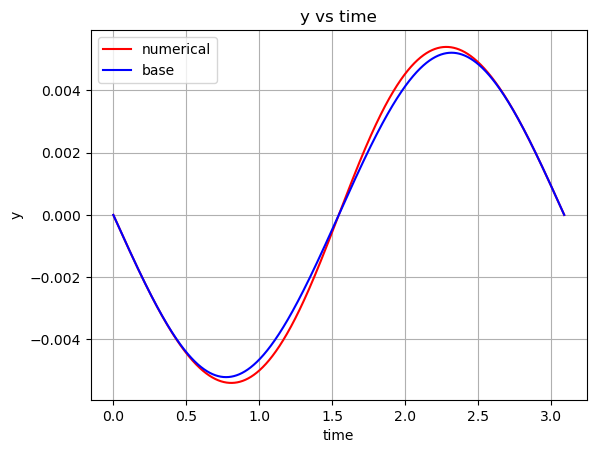

In [156]:
plt.figure()
plt.plot(time ,r[:,1],label='numerical', color='r')
plt.plot(timeb ,rb[:,1],label='base',color='b')
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs time")
plt.grid()
plt.legend()
plt.show()

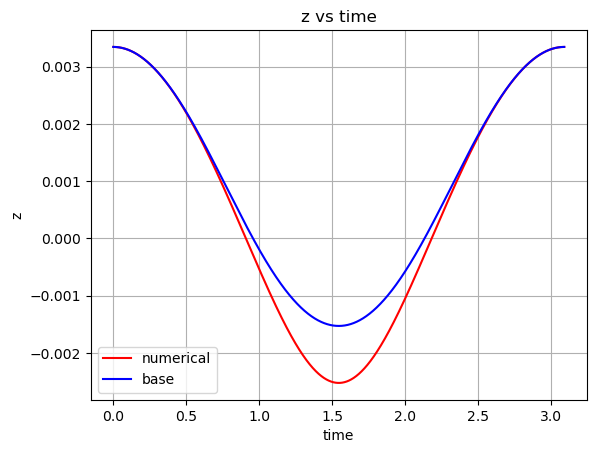

In [157]:
plt.figure()
plt.plot(time ,r[:,2],label='numerical', color='r')
plt.plot(timeb ,rb[:,2],label='base',color='b')
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs time")
plt.grid()
plt.legend()
plt.show()

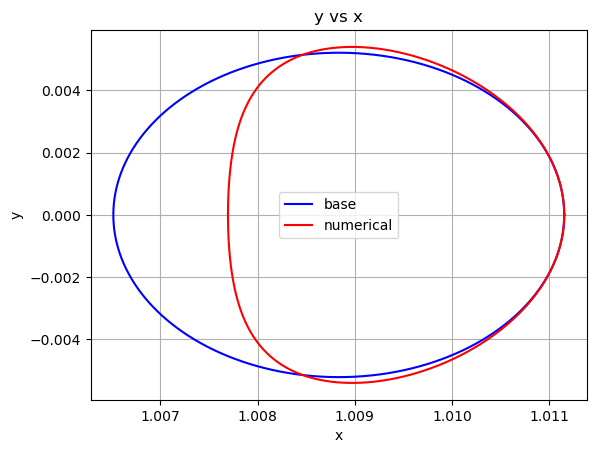

In [158]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,1],label='base',color='b')
plt.plot(r[:,0] ,r[:,1],label='numerical', color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.grid()
plt.legend()
plt.show()

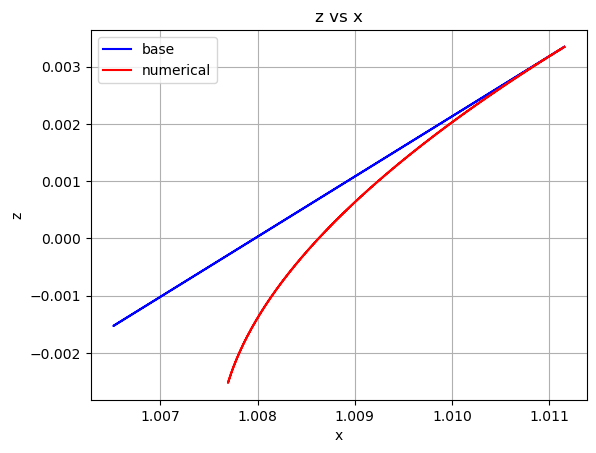

In [159]:
plt.figure()
plt.plot(rb[:,0] ,rb[:,2],label='base',color='b')
plt.plot(r[:,0] ,r[:,2],label='numerical', color='r')
plt.xlabel("x")
plt.ylabel("z")
plt.title("z vs x")
plt.grid()
plt.legend()
plt.show()

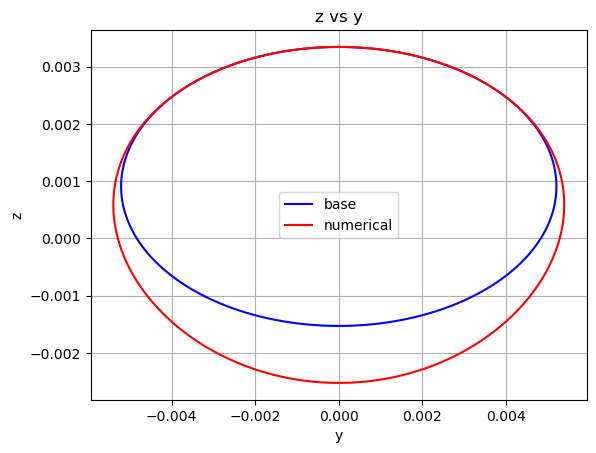

In [160]:
plt.figure()
plt.plot(rb[:,1] ,rb[:,2],label='base',color='b')
plt.plot(r[:,1] ,r[:,2],label='numerical', color='r')
plt.xlabel("y")
plt.ylabel("z")
plt.title("z vs y")
plt.grid()
plt.legend()
plt.show()

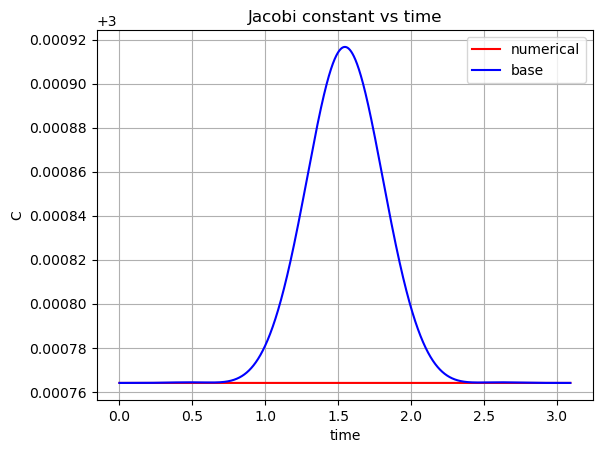

In [161]:
plt.figure()
plt.plot(time ,c_rk4, label='numerical', color='r')
plt.plot(timeb ,Cbase, label='base',color='b')
plt.xlabel("time")
plt.ylabel("C")
plt.title("Jacobi constant vs time")
plt.legend()
plt.grid()
plt.show()

In [162]:
rb=rb.astype(float)


In [163]:
rb

array([[ 1.01115557e+00,  4.88281914e-25,  3.34217004e-03],
       [ 1.01115557e+00, -1.03984392e-06,  3.34216999e-03],
       [ 1.01115557e+00, -2.07968779e-06,  3.34216985e-03],
       ...,
       [ 1.01115557e+00,  2.18592680e-06,  3.34216983e-03],
       [ 1.01115557e+00,  1.14608293e-06,  3.34216998e-03],
       [ 1.01115557e+00,  1.06239017e-07,  3.34217004e-03]])

In [164]:
r

array([[ 1.01115557e+00,  0.00000000e+00,  3.34217004e-03],
       [ 1.01115557e+00, -1.03984392e-06,  3.34216999e-03],
       [ 1.01115557e+00, -2.07968779e-06,  3.34216985e-03],
       ...,
       [ 1.01115557e+00,  2.18592626e-06,  3.34216983e-03],
       [ 1.01115557e+00,  1.14608239e-06,  3.34216998e-03],
       [ 1.01115557e+00,  1.06238475e-07,  3.34217004e-03]])

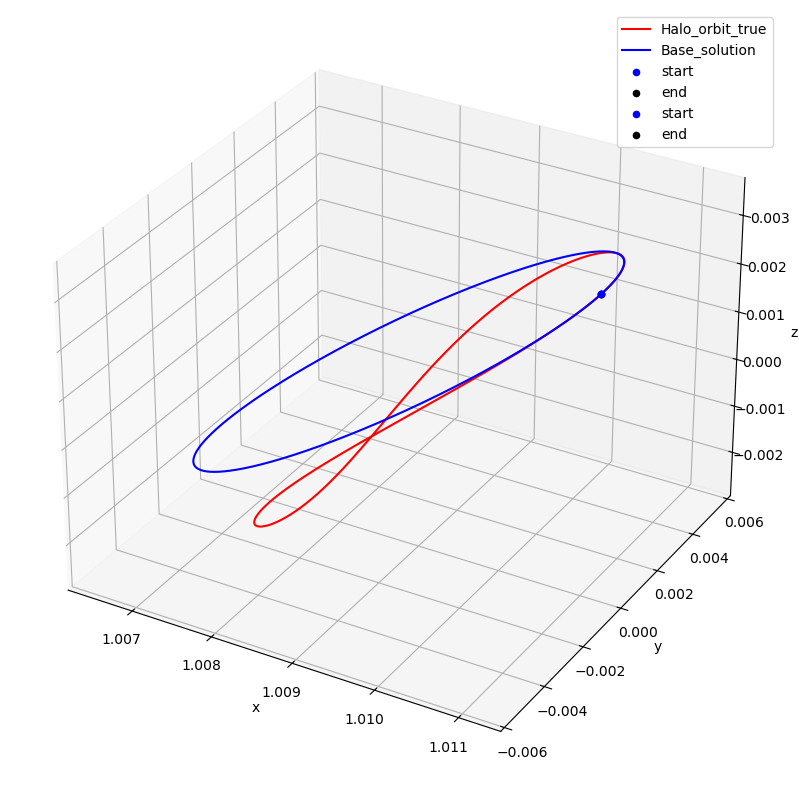

In [165]:
# plotting halo-orbit trajectory

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xb = rb[:,0]
yb = rb[:,1]
zb = rb[:,2]   

x = r[:,0]
y = r[:,1]
z = r[:,2] 
    

ax.plot(x,y,z, label='Halo_orbit_true', color='red')
ax.plot(xb,yb,zb, label='Base_solution', color='blue')

ax.scatter(x[0], y[0], z[0], color='blue', marker='o', label='start')
ax.scatter(x[-1], y[-1], z[-1], color='black', marker='o', label='end')

ax.scatter(xb[0], yb[0], zb[0], color='blue', marker='o', label='start')
ax.scatter(xb[-1], yb[-1], zb[-1], color='black', marker='o', label='end')

# Labels and legend

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set_title('Halo_orbit_comparison')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [166]:
np.abs((xb-x)).max()

np.float64(0.001179695229461819)

In [167]:
time.shape

(30914,)

In [168]:
timeb.shape

(30914,)

In [169]:
time[0]

np.float64(0.0)

In [170]:
timeb[0]

np.float64(0.0)

In [171]:
timeb[-1]

np.float64(3.0913)

In [172]:
time[-1]

np.float64(3.0913)

In [173]:
np.abs((yb-y)).max()

np.float64(0.0004132611828366341)

In [174]:
np.abs((zb-z)).max()

np.float64(0.0009944813172494005)

In [175]:
np.abs((Cbase-c_rk4)).max()

np.float64(0.00015265567540456715)